# Data Preparation for Prophet Model

This notebook prepares the cleaned stock data for use with the Prophet model. Prophet requires specific formatting:
- A column named 'ds' containing dates
- A column named 'y' containing the target values (closing prices)

We'll process each of the 20 stock datasets and save them in the appropriate format.

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Define Stock List and Data Paths

In [2]:
# List of stock symbols
stocks = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", 
          "META", "NVDA", "SPY", "V", "DIS",
          "NFLX", "PYPL", "BABA", "IBM", "AMD",
          "BA", "INTC", "T", "GS", "NKE"]

# Paths for input and output data

# Path to the project root (go up 2 levels from this file)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Correct paths
input_folder = os.path.join(project_root, "data", "cleaned")
output_folder = os.path.join(project_root, "data", "prophet", "initial")

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)


## 2. Prophet Data Preparation Function

Prophet requires a specific format with two main columns:
- `ds`: Date column
- `y`: Target value (typically closing price for stock prediction)

In [3]:
def prepare_prophet_data(df):
    """
    Prepare stock data for Prophet model.
    
    Parameters:
    - df: Cleaned dataframe with stock data
    
    Returns:
    - DataFrame formatted for Prophet
    """
    # Create a copy to avoid modifying the original
    prophet_df = df.copy()
    
    # Prophet requires columns named 'ds' (date) and 'y' (target)
    prophet_df = prophet_df.rename(columns={'date': 'ds', 'close': 'y'})
    
    # Select only needed columns for basic Prophet model
    basic_cols = ['ds', 'y']
    
    # Add additional regressor columns that might help the model
    regressor_cols = [
        'open',
        'high',
        'low',
        'volume',
        'ma5',
        'ma20',
        'ma50',
        'volatility',
        'volume_ma20',
        'return'
    ]
    
    # Combine columns
    selected_cols = basic_cols + [col for col in regressor_cols if col in prophet_df.columns]
    prophet_df = prophet_df[selected_cols]
    
    # Add a prediction target column for 5 days ahead (can be used for longer forecasts)
    if 'next_day_close' in df.columns:
        prophet_df['next_day_y'] = df['next_day_close']
        prophet_df['price_up'] = df['price_up']
    
    return prophet_df

## 3. Process Each Stock and Save Prophet Format Data

In [4]:
results_summary = []

for stock in stocks:
    try:
        # Input file path
        input_file = f"{input_folder}/{stock}.csv"
        
        # Check if file exists
        if not os.path.exists(input_file):
            print(f"Warning: {input_file} does not exist. Skipping {stock}.")
            continue
        
        # Read cleaned data
        df = pd.read_csv(input_file)
        
        # Ensure date column is in datetime format
        df['date'] = pd.to_datetime(df['date'])
        
        # Prepare data for Prophet
        prophet_df = prepare_prophet_data(df)
        
        # Output file path
        output_file = f"{output_folder}/{stock}_prophet.csv"
        
        # Save to CSV
        prophet_df.to_csv(output_file, index=False)
        
        # Collect summary statistics
        summary = {
            'stock': stock,
            'rows': len(prophet_df),
            'start_date': prophet_df['ds'].min().strftime('%Y-%m-%d'),
            'end_date': prophet_df['ds'].max().strftime('%Y-%m-%d'),
            'min_price': round(prophet_df['y'].min(), 2),
            'max_price': round(prophet_df['y'].max(), 2),
            'avg_price': round(prophet_df['y'].mean(), 2),
            'file_size_kb': round(os.path.getsize(output_file) / 1024, 2)
        }
        
        results_summary.append(summary)
        print(f"Processed {stock}: {len(prophet_df)} rows saved to {output_file}")
        
    except Exception as e:
        print(f"Error processing {stock}: {str(e)}")

# Create a summary DataFrame
summary_df = pd.DataFrame(results_summary)
print("\nData preparation for Prophet completed!")

/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to t

Processed AAPL: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/AAPL_prophet.csv
Processed MSFT: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/MSFT_prophet.csv
Processed GOOG: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/GOOG_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to t

Processed AMZN: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/AMZN_prophet.csv
Processed TSLA: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/TSLA_prophet.csv
Processed META: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/META_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to t

Processed NVDA: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/NVDA_prophet.csv
Processed SPY: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/SPY_prophet.csv
Processed V: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/V_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Processed DIS: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/DIS_prophet.csv
Processed NFLX: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/NFLX_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to t

Processed PYPL: 2477 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/PYPL_prophet.csv
Processed BABA: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/BABA_prophet.csv
Processed IBM: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/IBM_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Processed AMD: 2512 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/AMD_prophet.csv
Processed BA: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/BA_prophet.csv


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to t

Processed INTC: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/INTC_prophet.csv
Processed T: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/T_prophet.csv
Processed GS: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/GS_prophet.csv
Processed NKE: 2513 rows saved to /home/abderrahmane/Stock-Market-Predictor/data/prophet/initial/NKE_prophet.csv

Data preparation for Prophet completed!


/tmp/ipykernel_1275/422019070.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


## 4. Display Summary of Prepared Datasets

In [14]:
# Display summary table
summary_df

,stock,rows,start_date,end_date,min_price,max_price,avg_price,file_size_kb
0,AAPL,2513,2015-05-13,2025-05-08,20.67,258.74,101.00,574.21
1,MSFT,2513,2015-05-13,2025-05-08,35.39,464.85,194.43,568.59
2,GOOG,2513,2015-05-13,2025-05-08,25.72,207.47,87.63,569.97
3,AMZN,2513,2015-05-13,2025-05-08,21.09,242.06,107.84,562.77
4,TSLA,2513,2015-05-13,2025-05-08,9.58,479.86,126.10,569.69
5,META,2513,2015-05-13,2025-05-08,78.07,736.02,240.01,571.63
6,NVDA,2513,2015-05-13,2025-05-08,0.47,149.42,24.98,577.09
7,SPY,2513,2015-05-13,2025-05-08,156.33,611.09,326.97,569.90
8,V,2513,2015-05-13,2025-05-08,62.33,362.71,173.21,566.33
9,DIS,2513,2015-05-13,2025-05-08,78.35,199.45,113.17,568.07


## 5. Examine a Sample Dataset

Sample from AAPL_prophet.csv (First 5 rows):


,ds,y,open,high,low,volume,ma5,ma20,ma50,volatility,volume_ma20,return,next_day_y,price_up
0,2015-05-13 00:00:00-04:00,28.259068,28.290464,28.523695,28.227671,138776800,28.884309,29.091414,28.676284,0.010445,170446000.0,0.023332,28.918398,1
1,2015-05-14 00:00:00-04:00,28.918398,28.573038,28.918398,28.516973,180814000,28.884309,29.091414,28.676284,0.010445,170446000.0,0.023332,28.878025,0
2,2015-05-15 00:00:00-04:00,28.878025,28.945304,29.039493,28.752440,152832000,28.884309,29.091414,28.676284,0.010445,170446000.0,-0.001396,29.196480,1
3,2015-05-18 00:00:00-04:00,29.196480,28.790569,29.315338,28.786083,203531600,28.884309,29.091414,28.676284,0.010445,170446000.0,0.011028,29.169573,0
4,2015-05-19 00:00:00-04:00,29.169573,29.308613,29.351223,29.073139,178532800,28.884309,29.091414,28.676284,0.010445,170446000.0,-0.000922,29.167328,0


/tmp/ipykernel_11914/872048550.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sample_df['ds'] = pd.to_datetime(sample_df['ds'])


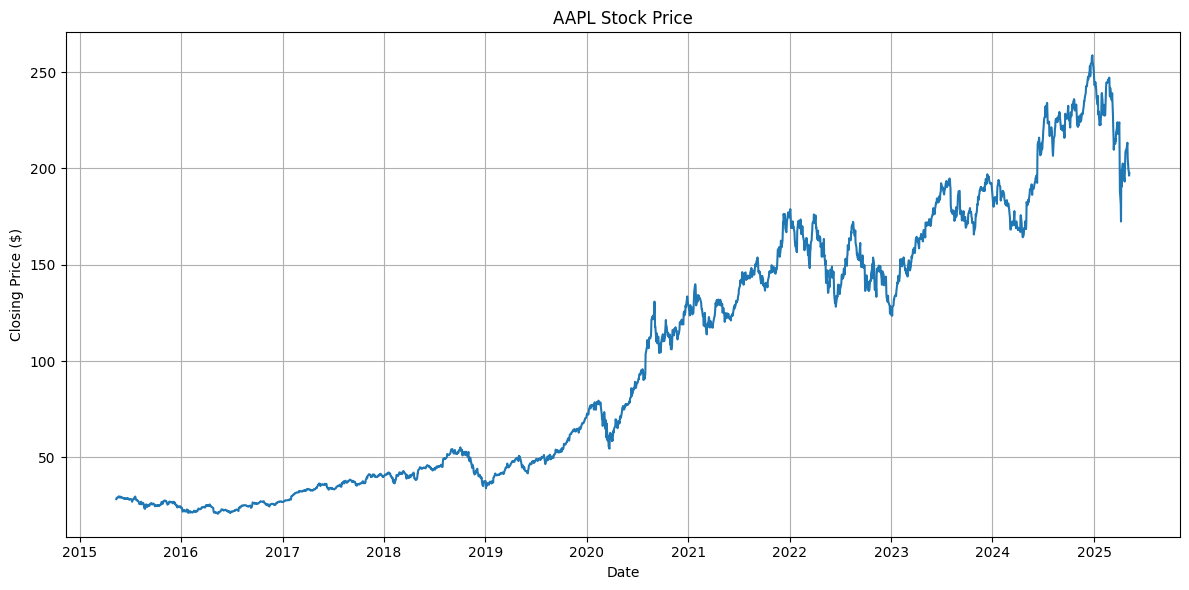

In [15]:
# Load sample dataset (AAPL)
sample_file = f"{output_folder}/AAPL_prophet.csv"
if os.path.exists(sample_file):
    sample_df = pd.read_csv(sample_file)
    print(f"Sample from AAPL_prophet.csv (First 5 rows):")
    display(sample_df.head())
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    sample_df['ds'] = pd.to_datetime(sample_df['ds'])
    plt.plot(sample_df['ds'], sample_df['y'])
    plt.title('AAPL Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Sample file not found. Please run the data preparation first.")

## 6. Data Ready for Prophet

Our data is now ready for training Prophet models. The prepared datasets include:

1. Required Prophet columns (`ds` for dates and `y` for target values)
2. Additional regressors that can be used as external features
3. Next day price information for evaluating forecasts

The data is saved in the `/data/prophet/` directory with filenames like `STOCK_prophet.csv`.